<a href="https://colab.research.google.com/github/onurozansunger/FDS-PROJECT/blob/main/son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings

In [29]:
netflix4 = pd.read_csv('/content/netflix4.csv')

In [3]:
netflix4.head()

,show_id,type,title,country,release_year,rating,averageRating,numVotes,genres,directors,category,primaryName
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,7.4,7119.0,"Biography,Documentary,Drama",nm0990310,actor,Michael Hilow
1,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,7.4,7119.0,"Biography,Documentary,Drama",nm0990310,actress,Ana Hoffman
2,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,8.0,22.0,"Crime,Documentary",nm1520612,actress,Susan Sarandon
3,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,7.3,528.0,"Crime,Drama,Mystery",nm0809375,director,Mike Smith
4,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,7.3,528.0,"Crime,Drama,Mystery",nm0809375,actor,Neill Rea


In [30]:
netflix4.drop([ 'directors', 'title', 'rating'], axis=1, inplace=True)

In [31]:
netflix5=netflix4[netflix4['category']=='director']

In [32]:
netflix5.drop([ 'show_id'], axis=1, inplace=True)

In [33]:
netflix5.drop(['release_year'], axis=1, inplace=True)

In [34]:
netflix5.head()

,type,country,averageRating,numVotes,genres,category,primaryName
3,TV Show,South Africa,7.3,528.0,"Crime,Drama,Mystery",director,Mike Smith
7,TV Show,South Africa,8.0,22.0,"Crime,Documentary",director,Steve Rivo
31,TV Show,NaN,7.2,11.0,"Crime,Short",director,Paul Desira
45,TV Show,NaN,7.6,55.0,Drama,director,Jirí Krejcík
54,TV Show,NaN,2.5,477.0,Horror,director,Tony Mandile


In [9]:
netflix5.columns

Index(['type', 'country', 'averageRating', 'numVotes', 'genres', 'category',
       'primaryName'],
      dtype='object')

In [35]:
netflix5.drop(['country'], axis=1, inplace=True)

In [36]:
warnings.filterwarnings('ignore')

# 'genres', 'country', 'primaryName' sütunlarını liste haline getirme ve 'type' sütununu binary'e dönüştürme
netflix5['genres'] = netflix5['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['primaryName'] = netflix5['primaryName'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['type'] = netflix5['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# 'rating', 'genres', 'country', 'primaryName' için benzersiz değerleri elde etme ve one-hot encoding uygulama
all_genres = sum(netflix5['genres'], [])
unique_genres = set(all_genres)
for genre in unique_genres:
    netflix5['Genre_' + genre] = netflix5['genres'].apply(lambda x: 1 if genre in x else 0)

all_names = sum(netflix5['primaryName'], [])
unique_names = set(all_names)
for name in unique_names:
    netflix5['Name_' + name] = netflix5['primaryName'].apply(lambda x: 1 if name in x else 0)

# Orijinal kategorik sütunları kaldırma
netflix5.drop(['genres', 'primaryName'], axis=1, inplace=True)

# Yeni DataFrame'in ilk beş satırını gösterme
print(netflix5.head())


    type  averageRating  numVotes  category  Genre_Reality-TV  \
3      0            7.3     528.0  director                 0   
7      0            8.0      22.0  director                 0   
31     0            7.2      11.0  director                 0   
45     0            7.6      55.0  director                 0   
54     0            2.5     477.0  director                 0   

    Genre_Documentary  Genre_Musical  Genre_War  Genre_History  Genre_News  \
3                   0              0          0              0           0   
7                   1              0          0              0           0   
31                  0              0          0              0           0   
45                  0              0          0              0           0   
54                  0              0          0              0           0   

    ...  Name_Juan Méndez  Name_Tomohiro Matsukawa  Name_Hugh Parks  \
3   ...                 0                        0                0  

In [37]:
netflix5.drop(['category'], axis=1, inplace=True)

In [13]:
netflix5.head()

,type,averageRating,numVotes,Genre_Reality-TV,Genre_Documentary,Genre_Musical,Genre_War,Genre_History,Genre_News,Genre_Game-Show,...,Name_Juan Méndez,Name_Tomohiro Matsukawa,Name_Hugh Parks,Name_Max Bourne,Name_Paul Bock,Name_Piet Baumgartner,Name_Enver Samuel,Name_Darran Scott,Name_Abhay Chopra,Name_Corinne van der Borch
3,0,7.3,528.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,22.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,7.2,11.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,7.6,55.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,2.5,477.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
numvotes_df=netflix5["numVotes"]

<Axes: xlabel='numVotes'>

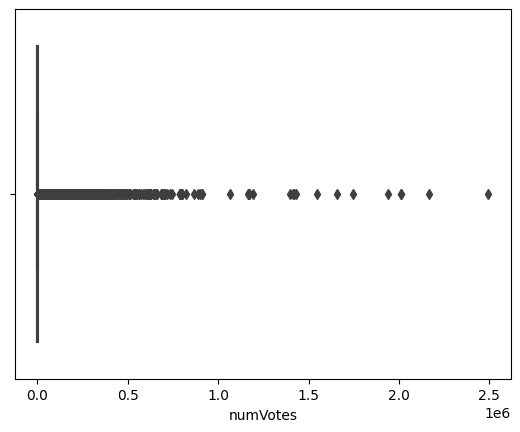

In [15]:
sns.boxplot(x=numvotes_df)

In [38]:
y_rating = netflix5['numVotes']

# IQR hesaplama
Q1 = y_rating.quantile(0.25)
Q3 = y_rating.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri filtreleme
not_outlier = (y_rating >= (Q1 - 1.5 * IQR)) & (y_rating <= (Q3 + 1.5 * IQR))

# Aykırı değerleri atılmış yeni bir DataFrame oluşturma
netflix5_clean = netflix5[not_outlier]

In [17]:
numvotes_df=netflix5_clean["numVotes"]

<Axes: xlabel='numVotes'>

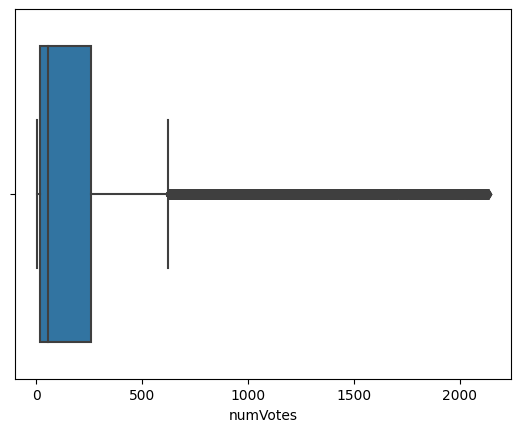

In [18]:
sns.boxplot(x=numvotes_df)

In [39]:
netflix5_clean.drop(['numVotes'], axis=1, inplace=True)

In [20]:
netflix5_clean.head()

,type,averageRating,Genre_Reality-TV,Genre_Documentary,Genre_Musical,Genre_War,Genre_History,Genre_News,Genre_Game-Show,Genre_Sport,...,Name_Juan Méndez,Name_Tomohiro Matsukawa,Name_Hugh Parks,Name_Max Bourne,Name_Paul Bock,Name_Piet Baumgartner,Name_Enver Samuel,Name_Darran Scott,Name_Abhay Chopra,Name_Corinne van der Borch
3,0,7.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,7.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,7.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y_rating = netflix5_clean['averageRating']

# IQR hesaplama
Q1 = y_rating.quantile(0.25)
Q3 = y_rating.quantile(0.75)
IQR = Q3 - Q1
# Aykırı değerleri filtreleme
not_outlier = (y_rating >= (Q1 - 1.5 * IQR)) & (y_rating <= (Q3 + 1.5 * IQR))

# Aykırı değerleri atılmış yeni bir DataFrame oluşturma
netflix6_clean = netflix5_clean[not_outlier]

In [22]:
netflix6_clean.head()

,type,averageRating,Genre_Reality-TV,Genre_Documentary,Genre_Musical,Genre_War,Genre_History,Genre_News,Genre_Game-Show,Genre_Sport,...,Name_Juan Méndez,Name_Tomohiro Matsukawa,Name_Hugh Parks,Name_Max Bourne,Name_Paul Bock,Name_Piet Baumgartner,Name_Enver Samuel,Name_Darran Scott,Name_Abhay Chopra,Name_Corinne van der Borch
3,0,7.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,7.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,7.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,7.4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
netflix6_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19652 entries, 3 to 137970
Columns: 16358 entries, type to Name_Corinne van der Borch
dtypes: float64(1), int64(16357)
memory usage: 2.4 GB


In [41]:
df_cleaned = netflix6_clean.dropna()

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19652 entries, 3 to 137970
Columns: 16358 entries, type to Name_Corinne van der Borch
dtypes: float64(1), int64(16357)
memory usage: 2.4 GB


In [42]:
X = df_cleaned.drop(['averageRating'], axis=1)  # 'numVotes' sütunu zaten çıkarıldı
y_rating = df_cleaned['averageRating']

# Eğitim ve test setlerini ayır
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

Cross Validation Random Forest

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Özellikleri ve hedef değişkeni ayır
X = df_cleaned.drop(['averageRating'], axis=1)  # 'numVotes' sütunu zaten çıkarıldı
y_rating = df_cleaned['averageRating']

# Eğitim ve test setlerini ayır
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

# Random Forest regresyon modeli oluştur
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Modeli eğit
model_rf.fit(X_train, y_rating_train)

# Modelin performansını değerlendir
y_pred_rating_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_rating_test, y_pred_rating_rf)
scores_rf = cross_val_score(model_rf, X_train, y_rating_train, cv=5)

print(f'Random Forest Modelin Test MSE\'si: {mse_rf}')
print(f'Random Forest Çapraz Doğrulama Skorları: {scores_rf}')
print(f'Ortalama Random Forest Skoru: {scores_rf.mean()}')


Random Forest Modelin Test MSE'si: 1.3268462789588948
Random Forest Çapraz Doğrulama Skorları: [0.09831854 0.05301472 0.0760849  0.04906826 0.05627599]
Ortalama Random Forest Skoru: 0.0665524809105517


Feature Selenction and Cross Validation Random Forest

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Veri setini yükleme (Bu adımı veri setinize göre değiştirmeniz gerekecek)
# netflix5_clean = pd.read_csv('yol/netflix5_clean.csv')

# Özellikleri ve hedef değişkeni ayır
X = df_cleaned.drop(['averageRating'], axis=1)  # 'numVotes' sütunu zaten çıkarıldı
y_rating = df_cleaned['averageRating']

# Eğitim ve test setlerini ayırma
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

# İlk Random Forest modelini eğiterek özellik önemlerini al
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_rating_train)

# Özellik önemlerini al
feature_importances = rf.feature_importances_

# Az önemli özellikleri belirleme
threshold = 0.01  # Önem eşiği
less_important_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance < threshold]

# Az önemli özellikleri at
X_selected_features = X.drop(less_important_features, axis=1)

# Seçilen özelliklerle eğitim ve test setlerini tekrar oluştur
X_train_selected, X_test_selected, y_rating_train, y_rating_test = train_test_split(
    X_selected_features, y_rating, test_size=0.2, random_state=0)

# Seçilen özelliklerle Random Forest modelini eğit
model_rf_selected = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf_selected.fit(X_train_selected, y_rating_train)

# Modelin performansını değerlendir
y_pred_rating_rf_selected = model_rf_selected.predict(X_test_selected)
mse_rf_selected = mean_squared_error(y_rating_test, y_pred_rating_rf_selected)
scores_rf_selected = cross_val_score(model_rf_selected, X_train_selected, y_rating_train, cv=5)

print(f'Seçilmiş Özelliklerle Random Forest Modelin Test MSE\'si: {mse_rf_selected}')
print(f'Seçilmiş Özelliklerle Random Forest Çapraz Doğrulama Skorları: {scores_rf_selected}')
print(f'Ortalama Seçilmiş Özelliklerle Random Forest Skoru: {scores_rf_selected.mean()}')


Random Forest Modelin Test MSE'si: 1.222937281476259
Random Forest Çapraz Doğrulama Skorları: [0.10874635 0.14024465 0.12678089 0.11968736 0.08978097]
Ortalama Random Forest Skoru: 0.11704804315582165


Cross Validation Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Ridge regresyon modeli oluştur
model_ridge = Ridge(alpha=1.0)  # Alpha değerini ayarlayabilirsiniz

# Modeli eğit
model_ridge.fit(X_train, y_rating_train)

# Modelin performansını değerlendir
y_pred_rating_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_rating_test, y_pred_rating_ridge)
scores_ridge = cross_val_score(model_ridge, X_train, y_rating_train, cv=5)

print(f'Ridge Modelin Test MSE\'si: {mse_ridge}')
print(f'Ridge Çapraz Doğrulama Skorları: {scores_ridge}')
print(f'Ortalama Ridge Skoru: {scores_ridge.mean()}')


Ridge Modelin Test MSE'si: 1.1857272239042969
Ridge Çapraz Doğrulama Skorları: [0.16106958 0.14611474 0.15898546 0.13437971 0.14433224]
Ortalama Ridge Skoru: 0.1489763473966632


XGBOOST (ÖZELLİK AZALTMA)

In [22]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Veri setini yükleme
df=df_cleaned

# Hedef (target) ve özellikler (features) belirleme
target = df['averageRating']
features = df.drop('averageRating', axis=1)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# İlk modeli oluşturma ve eğitme
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)

# Özellik önemlerini elde etme
feature_importances = model.feature_importances_

# Önemli özellikleri seçme
threshold = np.sort(feature_importances)[-10]  # Örneğin, en önemli 10 özelliği seç
important_features = [feature for feature, importance in zip(features.columns, feature_importances) if importance >= threshold]

# Önemli özelliklerle yeni bir model oluşturma ve eğitme
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

model_important = xgb.XGBRegressor(objective ='reg:squarederror')
model_important.fit(X_train_important, y_train)

# Yeni modeli değerlendirme
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Model Performance:")
    print("------------------")
    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.4f}".format(np.sqrt(mse)))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2): {:.4f}".format(r2))

evaluate_model(model_important, X_test_important, y_test)


Model Performance:
------------------
Mean Squared Error (MSE): 1.2986
Root Mean Squared Error (RMSE): 1.1395
Mean Absolute Error (MAE): 0.9088
R-squared (R2): 0.0553


Lineer Regression

In [50]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = df_cleaned

# Hedef (target) ve özellikler (features) belirleme
target = df['averageRating']
features = df.drop('averageRating', axis=1)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train, y_train)

# Model değerlendirme fonksiyonu
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Model Performance:")
    print("------------------")
    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.4f}".format(np.sqrt(mse)))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2): {:.4f}".format(r2))

# Modeli değerlendir
evaluate_model(model, X_test, y_test)


Model Performance:
------------------
Mean Squared Error (MSE): 1.3383
Root Mean Squared Error (RMSE): 1.1568
Mean Absolute Error (MAE): 0.9307
R-squared (R2): 0.0264
